# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# if working in workspace use "active_sesssion"
'''
!pip -q install ./python
import workspace_utils
from workspace_utils import active_session
'''

from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [ ]:
# When working in the workspace
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis.x86_64.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from MADDPG.maddpg_agent import MADDPG
agent1 = MADDPG(state_size=state_size, action_size=action_size, n_agents=1,random_seed=1)
agent2 = MADDPG(state_size=state_size, action_size=action_size, n_agents=1,random_seed=1)

In [6]:
def train(algorithm, path , solution, n_episodes): #
    """
    Parameters:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    Other function parameters:
        algorithm (str): name of the type of DQN used 
        path (str): location where to save the trained parameters of the network
        solution (str): it will complement the name of the file that holds the trained parameters so we can have
        solution1, solution2....solutionN
    """
    
    print('Initializing ' + algorithm + ' train...')
    
    scores = []                        # list containing scores from each episode
    average_scores = []                # list containing the average scores every 100 episodes
    max_score = 0
    enviroment_solved = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment
        states = env_info.vector_observations               # get the current state
        agent1.reset()
        agent2.reset()
        episode_scores = np.zeros(num_agents)               # scores for each agent 
        
        while True:
            actions1 = agent1.act(states[0])                 # select an action
            actions2 = agent2.act(states[1])                 # select an action
            actions = np.array([actions1[0], actions2[0]])
            #actions = np.concatenate((actions1, actions2), axis=0).flatten()
            
            env_info = env.step(actions)[brain_name]   # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                    # see if episode has finished
            
            agent1.step(states[0], actions1, rewards[0], next_states[0], dones[0])
            agent2.step(states[1], actions2, rewards[1], next_states[1], dones[1])
            
            states = next_states
            episode_scores += np.array(rewards)
            
            if np.any(dones):
                break 
                
        score = np.max(episode_scores)         # Summary of scores for this episode        
        scores_window.append(score)             # save most recent score
        scores.append(score)                    # save most recent score
        
        print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)), end="")
        average_scores.append(np.mean(scores_window))              # save the average score
        if i_episode % 100 == 0:
            print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
        if np.mean(scores_window)>=0.5 and enviroment_solved == 0:
            print('\nEnvironment solved in {:d} episodes!\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
            enviroment_solved = 1
        if i_episode % 100 == 0 and np.mean(scores_window)>= max_score:
            print('Model saved at this point')
            torch.save(agent1.actor_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint_critic2.pth')
            max_score = np.mean(scores_window)
        if i_episode==n_episodes: 
            break
               
    # Saving the scores   
    with open(path + algorithm + '_' + solution +'_scores.txt','w') as file:
        for score, average in zip(scores, average_scores):
            file.write(('%2f\t, %2f\n') % (score, average))
    file.close()
    
    print(algorithm +' done.!')
    return scores, average_scores

In [7]:
N = 1000     # number of episodes
algorithm = 'MADDPG'
solution = 'SOLUTION_1'
path = 'MADDPG/' # where to save the scores
with active_session():
    scores, average_scores = train(algorithm, path, solution, N)

Initializing MADDPG train...
Episode 100	MADDPG Average Score: 0.00
Episode 200	MADDPG Average Score: 0.00
Episode 300	MADDPG Average Score: 0.03
Episode 400	MADDPG Average Score: 0.08
Episode 500	MADDPG Average Score: 0.08
Episode 600	MADDPG Average Score: 0.12
Episode 678	MADDPG Average Score: 0.50
Environment solved in 678 episodes!	MADDPG Average Score: 0.50
Episode 700	MADDPG Average Score: 0.65
Episode 800	MADDPG Average Score: 0.91
Episode 900	MADDPG Average Score: 1.40
Episode 1000	MADDPG Average Score: 1.03
MADDPG done.!


In [1]:
# This functions get the scores
def get_scores(algorithm, path, solution):
    score = []
    average = []
    with open(path + algorithm + '_' + solution +'_scores.txt') as file:
        for line in file:
            score.append(float(line.split()[0]))
            average.append(float(line.split()[2]))
    file.close()
    return score, average

In [3]:
# To get all the scores from a .txt file. 'no need to train again if notebook is reloaded'
algorithm = 'MADDPG'
solution = 'SOLUTION_1'
path = 'MADDPG/' # where to save the scores
scores, average_scores = get_scores(algorithm, path, solution)

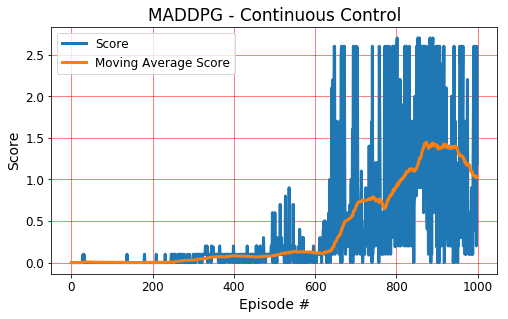

In [4]:
# plot the scores
fig = plt.figure(figsize=(8,10))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
ax1 = fig.add_subplot(211)
plt.plot(np.arange(len(scores)), scores, linewidth=3)
plt.plot(np.arange(len(average_scores)), average_scores, linewidth=3)
ax1.legend(['Score', 'Moving Average Score'])  #,loc=4
ax1.grid(linestyle='-', linewidth='0.5', color='red')
plt.title('MADDPG - Continuous Control')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [6]:
# Test performance 
agent1.actor_local.load_state_dict(torch.load('MADDPG/MADDPG_SOLUTION_1_checkpoint_actor1.pth',map_location=torch.device('cpu')))
agent2.actor_local.load_state_dict(torch.load('MADDPG/MADDPG_SOLUTION_1_checkpoint_actor2.pth',map_location=torch.device('cpu')))
agent1.critic_local.load_state_dict(torch.load('MADDPG/MADDPG_SOLUTION_1_checkpoint_critic1.pth',map_location=torch.device('cpu')))
agent2.critic_local.load_state_dict(torch.load('MADDPG/MADDPG_SOLUTION_1_checkpoint_critic2.pth',map_location=torch.device('cpu')))

for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    agent1.reset()
    agent2.reset()
    while True:
        actions1 = agent1.act(states[0], add_noise=False)                 # select an action
        actions2 = agent2.act(states[1], add_noise=False)                 # select an action
        actions = np.array([actions1[0], actions2[0]])
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

c:\users\abdullah\anaconda3\envs\deeprl\lib\site-packages\torch\nn\functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score (max over agents) from episode 1: 2.600000038743019
Score (max over agents) from episode 2: 2.600000038743019
Score (max over agents) from episode 3: 2.7000000402331352
Score (max over agents) from episode 4: 2.600000038743019
Score (max over agents) from episode 5: 0.9000000134110451
Score (max over agents) from episode 6: 2.600000038743019
Score (max over agents) from episode 7: 0.20000000298023224
Score (max over agents) from episode 8: 2.600000038743019
Score (max over agents) from episode 9: 2.600000038743019


In [7]:
env.close()